Objective: Determine whether the distributions of primary activities (Ideation and Development, Design, Materials, Production and Assembling, Tooling and Machining, and Supply Chain and Logistics) for AM and TM are different or not. 

Sample: 12,445 job postings from Service Bureaus (SB).

Data characteristics: (1) Categorical variables: Ideation and Development, Design, Materials, Production and Assembling, Tooling and Machining, and Supply Chain and Logistics; (2) Clustered data: intra-firm correlation of job postings.

Used technique: Chi-squared test for homogeneity for the count of terms in each primary activity to see if AM distribution differs from TM distribution, by occupation and taking into account intra-firm correlation of job postings.

Why a Chi-squared test for homogeneity?
* The nonparametric Kolmogorov-Smirnov test is not appropriated as it was originally designed for continuous distributions
* On the other hand, the chi-squared statistic is a parametric test for discrete distributions.
* There are three kinds of chi-squared tests. The chi-square test for homogeneity is one of them. It is used for determining whether the distributions of two variables are similar (null hypothesis) or not.
* Useful explanation of the test: https://www.khanacademy.org/math/ap-statistics/chi-square-tests/chi-square-tests-two-way-tables/v/chi-square-test-homogeneity
* Chi-squared test for homogeneity corrected for clustered data, as suggested in Gregg, Datta, and Lorenz (2020) 'Variance estimation in tests of clustered categorical data with informative cluster size', following
https://github.com/megregg/htestClust/blob/master/R/chisqtestClust.R

This notebook shows for each occupation:
1. Contingency table
2. Bars by technology
3. Chi-squared test without correcting for intra-firm correlation
4. Chi-squared test correcting for intra-firm correlation

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import chi2_contingency

## SB sample

In [2]:
SB = pandas.read_csv('D:/BG/Paper_2/analyses-2/SB/SB-Data.csv')
SB

,BGTJobId,JobDate,CleanTitle,CanonTitle,SOC,SOCName,ONET,ONETName,Employer,Sector,...,Employer_clean,n_terms,SK_without,TECH,occupation,firm1,firm2,firm,plant,plant_5
0,351932089,2014-01-04,Mechanical Engineer,Mechanical Engineer,172141,Mechanical Engineers,17-2141.00,Mechanical Engineers,Carpenter Technology Corporation,31-33,...,carpenter technology,11,"troubleshooting,verbal / oral communication,co...",TM,Engineer,carpenter,technolo,Carpenter Technolo,Carpenter Technolo Reading,0.0
1,352056182,2014-01-04,Mechanical Maintenance Person,Maintenance Person,173026,Industrial Engineering Technicians,17-3026.00,Industrial Engineering Technicians,Carpenter Technology Corporation,31-33,...,carpenter technology,8,"machining,welding,industrial mechanic experien...",TM,Technician,carpenter,technolo,Carpenter Technolo,Carpenter Technolo Reading,0.0
2,352057607,2014-01-04,Mechanical Maintenance Trainee,NaN,172141,Mechanical Engineers,17-2141.00,Mechanical Engineers,Carpenter Technology Corporation,31-33,...,carpenter technology,2,"mechanical maintenance,carpentry",TM,Engineer,carpenter,technolo,Carpenter Technolo,Carpenter Technolo Reading,0.0
3,352058746,2014-01-04,Electrical Maintenance Trainee,NaN,173023,Electrical and Electronics Engineering Technic...,17-3023.01,Electronics Engineering Technicians,Carpenter Technology Corporation,31-33,...,carpenter technology,2,"electrical devices,carpentry",TM,Technician,carpenter,technolo,Carpenter Technolo,Carpenter Technolo Reading,0.0
4,352058822,2014-01-04,Supervisor Adv Engineering,NaN,119199,"Managers, All Other",11-9199.00,"Managers, All Other",Carpenter Technology Corporation,31-33,...,carpenter technology,13,"budgeting,staff management,troubleshooting,ver...",TM,Manager,carpenter,technolo,Carpenter Technolo,Carpenter Technolo Reading,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12440,38688610810,2019-12-30,Quality Technician II Prb,Quality Technician,519061,"Inspectors, Testers, Sorters, Samplers, and We...",51-9061.00,"Inspectors, Testers, Sorters, Samplers, and We...",Arconic,31-33,...,arconic,8,"sample preparation,quality assurance and contr...",TM,Operator,arconic,foundati,Arconic Foundati,Arconic Foundati Fullerton,2.0
12441,38688744068,2019-12-31,Supply Chain Project Manager,Supply Chain Manager,119199,"Managers, All Other",11-9199.04,Supply Chain Managers,Fast Radius,31-33,...,fast radius,27,"manufacturing processes,material requirement p...",TM,Manager,fast,radius,Fast Radius,Fast Radius Chicago,0.0
12442,38689002966,2019-12-31,3D Printing - Additive Technician,NaN,515112,Printing Press Operators,51-5112.00,Printing Press Operators,Xometry Inc,31-33,...,xometry,12,"algebra,microsoft excel,manual dexterity,compu...",AM,Operator,xometry,NaN,Xometry,Xometry Gaithersburg,0.0
12443,38689119712,2019-12-31,"Machining Technician V, Header",NaN,173023,Electrical and Electronics Engineering Technic...,17-3023.01,Electronics Engineering Technicians,Arconic,31-33,...,arconic,5,international traffic in arms regulations (ita...,TM,Technician,arconic,foundati,Arconic Foundati,Arconic Foundati City Of Industry,2.0


## Primary activities in SB sample

In [120]:
df1 = pandas.read_csv('D:/BG/Paper_2/analyses-2/Labelling/Phases-mixture.csv')
print(df1['Phases'].value_counts())
print(df1)
Ideation = df1.loc[df1['Phases'] == 'Ideation and Development','Skill_US'].tolist()
Design = df1.loc[df1['Phases'] == 'Design','Skill_US'].tolist()
Materials = df1.loc[df1['Phases'] == 'Materials','Skill_US'].tolist()
Production = df1.loc[df1['Phases'] == 'Production and Assembling','Skill_US'].tolist()
Tooling = df1.loc[df1['Phases'] == 'Tooling and Machining','Skill_US'].tolist()
Supply = df1.loc[df1['Phases'] == 'Supply Chain and Logistics','Skill_US'].tolist()
mydict = {'Ideation and Development':Ideation,'Design':Design,'Materials':Materials,'Production and Assembling':Production,'Tooling and Machining':Tooling,'Supply Chain and Logistics':Supply}
df2 = SB.copy()
df2.SK = df2.SK.str.split(',')
df2 = df2[['BGTJobId','firm','SK','TECH','occupation']]
mylist = df2[['BGTJobId','SK']].values.tolist()
print(mylist[0:5])
df3 = []
for job in mylist:
  for phase in mydict:
    c = 0
    for phrase in mydict[phase]:
      c = c + job[1].count(phrase)
    df3.append([job[0],phase,c])
df3 =  pandas.DataFrame(df3,columns=['BGTJobId','Phases','Count'])
df3 = df3.pivot(index='BGTJobId',columns='Phases',values='Count')
df3 = df3.merge(df2,left_on='BGTJobId',right_on='BGTJobId')
df3 = df3[['BGTJobId','firm','SK','TECH','occupation']+list(mydict.keys())]
df3

Support Activities            4583
Software                      3651
Tooling and Machining         1210
Materials                      811
Supply Chain and Logistics     663
Design                         330
Production and Assembling      326
General Skills                 222
Ideation and Development       219
Name: Phases, dtype: int64
       SkillId               Skill_US              Phases
0            3      anxiety reduction  Support Activities
1            5             injections            Software
2           11  hm customs and excise  Support Activities
3           12      behavioral health  Support Activities
4           13      energy management  Support Activities
...        ...                    ...                 ...
12010    18031                  latex            Software
12011    18034         rapid recovery            Software
12012    18035       react javascript            Software
12013    18036   virtual reality (vr)            Software
12014  9000069      

,BGTJobId,firm,SK,TECH,occupation,Ideation and Development,Design,Materials,Production and Assembling,Tooling and Machining,Supply Chain and Logistics
0,351932089,Carpenter Technolo,"[troubleshooting, verbal / oral communication,...",TM,Engineer,0,2,0,0,2,0
1,352056182,Carpenter Technolo,"[machining, welding, industrial mechanic exper...",TM,Technician,0,0,0,1,6,0
2,352057607,Carpenter Technolo,"[mechanical maintenance, carpentry]",TM,Engineer,0,0,0,0,2,0
3,352058746,Carpenter Technolo,"[electrical devices, carpentry]",TM,Technician,0,0,0,0,2,0
4,352058822,Carpenter Technolo,"[budgeting, staff management, troubleshooting,...",TM,Manager,0,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
12440,38688610810,Arconic Foundati,"[sample preparation, quality assurance and con...",TM,Operator,0,0,0,0,3,0
12441,38688744068,Fast Radius,"[manufacturing processes, material requirement...",TM,Manager,0,2,0,1,1,9
12442,38689002966,Xometry,"[algebra, microsoft excel, manual dexterity, c...",AM,Operator,0,1,0,0,1,1
12443,38689119712,Arconic Foundati,[international traffic in arms regulations (it...,TM,Technician,0,0,0,0,3,0


### Observed (O) proportions - Managers

In [182]:
manager = df3.loc[df3.occupation=='Manager']
O = manager.groupby(['TECH'])[list(mydict.keys())].sum()
O.loc['Column Total'] = O.sum(numeric_only=True,axis=0)
O.loc[:,'Row Total'] = O.sum(numeric_only=True,axis=1)
O

,Ideation and Development,Design,Materials,Production and Assembling,Tooling and Machining,Supply Chain and Logistics,Row Total
TECH,,,,,,,
AM,134,261,53,182,64,89,783
TM,789,513,600,3109,1217,3818,10046
Column Total,923,774,653,3291,1281,3907,10829


### Bars by technology - Managers

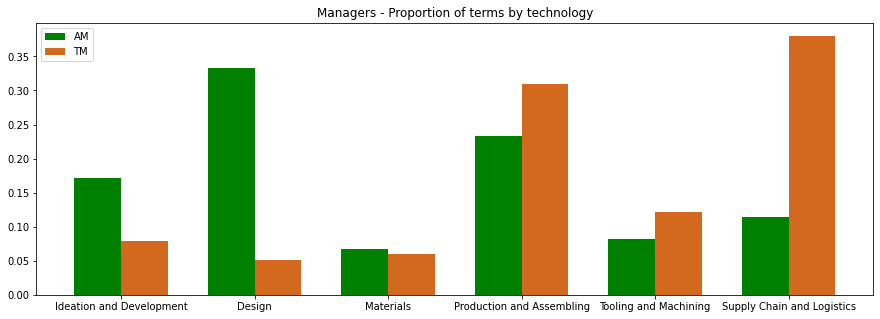

In [183]:
am = O.loc[O.index=='AM']/O.at['AM','Row Total']
tm = O.loc[O.index=='TM']/O.at['TM','Row Total']
am = am.iloc[0,0:-1].to_numpy()
tm = tm.iloc[0,0:-1].to_numpy()
fig = plt.figure(figsize=(15,5))
x = numpy.arange(0,len(mydict.keys()),1)
width = 0.35
plt.bar(x-width/2,am,width,label='AM',color='green')
plt.bar(x+width/2,tm,width,label='TM',color='chocolate')
plt.title('Managers - Proportion of terms by technology')
plt.xticks(x,list(mydict.keys()),rotation='horizontal')
plt.legend()
plt.show()

### Expected (E) proportions - Managers

In [184]:
n = O.at['Column Total','Row Total']
E = O.copy()
E = E.astype('float')
for x in E.index[0:-1]:
  for y in E.columns[0:-1]:
    v = (((E.at[x,'Row Total'])*(E.at['Column Total',y]))/n)
    E.at[x,y] = v
E

,Ideation and Development,Design,Materials,Production and Assembling,Tooling and Machining,Supply Chain and Logistics,Row Total
TECH,,,,,,,
AM,66.738295,55.964724,47.215717,237.958537,92.623788,282.498938,783.0
TM,856.261705,718.035276,605.784283,3053.041463,1188.376212,3624.501062,10046.0
Column Total,923.000000,774.000000,653.000000,3291.000000,1281.000000,3907.000000,10829.0


### Chi-squared test for homogeneity - Managers

In [185]:
O = O.iloc[[0,1],0:-1]
E = E.iloc[[0,1],0:-1]
statistic = numpy.sum(((O-E)**2/E).values)
dof = (len(O.columns)-1)*(len(O.index)-1)
pval = 1-stats.chi2.cdf(statistic,dof)
print(statistic,'Chi-squared without correcting for intra-firm correlation')
print(pval,'p-value, the distributions of AM and TM statistically differ')
tstat_scipy,pval_scipy,ddof_scipy,exp_scipy=chi2_contingency(O,correction=False)
print("Chi-squared test statistic (without Yates correction (from Scipy): " + str(tstat_scipy))
print("p-value without Yates correction (from Scipy): " + str(pval_scipy))

1050.1507036665862 Chi-squared without correcting for intra-firm correlation
0.0 p-value, the distributions of AM and TM statistically differ
Chi-squared test statistic (without Yates correction (from Scipy): 1050.1507036665857
p-value without Yates correction (from Scipy): 8.329298670325247e-225


### Chi-squared test for homogeneity corrected by firm - Managers

In [186]:
print(manager.firm.nunique(),'firms')
df = manager.copy()
print(df.TECH.value_counts())
M = df.loc[df.TECH=='AM','firm'].unique()
print(len(M),'paired firms')
df = df[['firm','TECH']+list(mydict.keys())]
df = df.groupby(['firm','TECH']).sum()
mux = pandas.MultiIndex.from_product([sorted(manager.firm.unique()),['AM','TM']],names=['firm','TECH'])
df = df.reindex(mux,fill_value=0)
df

13 firms
TM    3596
AM     192
Name: TECH, dtype: int64
11 paired firms


Ideation and Development  Design  Materials  \
firm               TECH                                                
Align Technolo     AM                           0       0          0   
                   TM                          43      16          0   
Arconic Foundati   AM                           4       8          7   
                   TM                         139      57        353   
Argen              AM                           0       0          0   
                   TM                           2       1          0   
Carbon 3d          AM                          23      35          8   
                   TM                          18       6          4   
Carpenter Technolo AM                           1       1          2   
                   TM                          25      13        123   
Exone              AM                           2       4          0   
                   TM                           0       5          0   
Fast Radius        AM                           4      21          3   
                   TM                           1       5          0   
Jabil Circuit      AM                           4      17          0   
                   TM                         506     367         82   
Oerlikon Group     AM                           3      12          7   
                   TM                           0       6          9   
Protolabs          AM                           6      15          6   
                   TM                          17      17         12   
Shapeways          AM                          20      53          4   
                   TM                           0       1          1   
Stratasys Direct   AM                          67      94         16   
                   TM                          33      17         15   
Xometry            AM                           0       1          0   
                   TM                           5       2          1   

                         Production and Assembling  Tooling and Machining  \
firm               TECH                                                     
Align Technolo     AM                            0                      0   
                   TM                           25                      4   
Arconic Foundati   AM                            0                      0   
                   TM                         1730                    443   
Argen              AM                            0                      0   
                   TM                            2                      6   
Carbon 3d          AM                           19                      3   
                   TM                           28                     12   
Carpenter Technolo AM                            2                      2   
                   TM                          167                    138   
Exone              AM                            2                      0   
                   TM                            0                      2   
Fast Radius        AM                           15                      7   
                   TM                            1                      1   
Jabil Circuit      AM                            8                      3   
                   TM                         1050                    553   
Oerlikon Group     AM                            4                      0   
                   TM                           56                     18   
Protolabs          AM                           16                     13   
                   TM                           22                     21   
Shapeways          AM                           33                      3   
                   TM                            3                      1   
Stratasys Direct   AM                           82                     33   
                   TM                           17                     17   
Xometr

In [187]:
O = df.copy()
O.loc[:,'RS'] = O.sum(numeric_only=True,axis=1)
O['RS'] = O['RS'].groupby(['firm']).transform('sum')
O = O[list(mydict.keys())+['RS']]
for a in list(mydict.keys()):
  O[a] = O[a]/O['RS']
O = O[list(mydict.keys())]
E = df.copy()
E = E.astype('float')
E = E.groupby(['firm']).sum()
E['TECH'] = 'Total'
E = E.set_index('TECH',append=True)
E = E.append(df)
E.sort_index(axis=0,inplace=True)
E['total'] = E[list(mydict.keys())].sum(axis=1)
for i in sorted(manager.firm.unique()):
  for x in E.index:
    if x[0] == i and x[1] != 'Total':
      for y in E.columns[0:-1]:
        v = E.at[x,'total']*E.at[(i,'Total'),y]/E.at[(i,'Total'),'total']
        E.at[x,y] = v
E = E[list(mydict.keys())]
E = E.drop(index='Total',level=1)
E.loc[:,'RS'] = E.sum(numeric_only=True,axis=1)
E['RS'] = E['RS'].groupby(['firm']).transform('sum')
E = E[list(mydict.keys())+['RS']]
for a in list(mydict.keys()):
  E[a] = E[a]/E['RS']
E = E[list(mydict.keys())]
O = O.unstack('TECH').to_numpy()
E = E.unstack('TECH').to_numpy()
D = O - E
Dhat = numpy.mean(D,axis=0)
Vhat = numpy.cov(D,rowvar=False)
STATISTIC = manager.firm.nunique()*(Dhat.T@numpy.linalg.pinv(Vhat)@Dhat)
dof = (len(list(mydict.keys()))-1)*(manager.TECH.nunique()-1)
pval = 1-stats.chi2.cdf(STATISTIC,dof)
print(STATISTIC,'Chi-squared correcting for intra-firm correlation')
print(pval,'p-value, the distributions of AM and TM statistically differ')

13.808140588431458 Chi-squared correcting for intra-firm correlation
0.016875176754004073 p-value, the distributions of AM and TM statistically differ


### Observed (O) proportions - Engineers

In [188]:
engineer = df3.loc[df3.occupation=='Engineer']
O = engineer.groupby(['TECH'])[list(mydict.keys())].sum()
O.loc['Column Total'] = O.sum(numeric_only=True,axis=0)
O.loc[:,'Row Total'] = O.sum(numeric_only=True,axis=1)
O

,Ideation and Development,Design,Materials,Production and Assembling,Tooling and Machining,Supply Chain and Logistics,Row Total
TECH,,,,,,,
AM,285,380,258,322,341,97,1683
TM,1472,1839,1920,6730,4055,1183,17199
Column Total,1757,2219,2178,7052,4396,1280,18882


### Bars by technology - Engineers

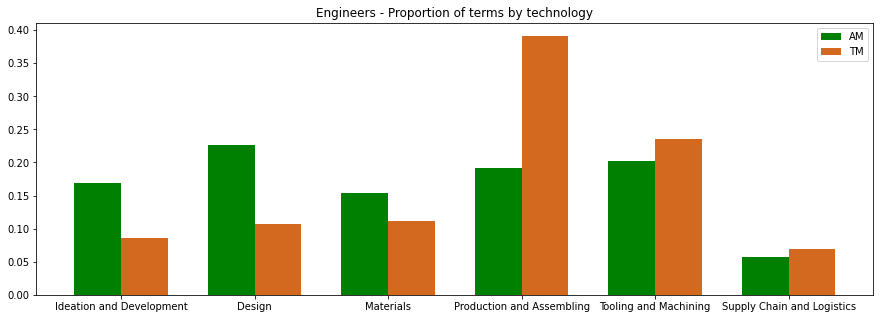

In [189]:
am = O.loc[O.index=='AM']/O.at['AM','Row Total']
tm = O.loc[O.index=='TM']/O.at['TM','Row Total']
am = am.iloc[0,0:-1].to_numpy()
tm = tm.iloc[0,0:-1].to_numpy()
fig = plt.figure(figsize=(15,5))
x = numpy.arange(0,len(mydict.keys()),1)
width = 0.35
plt.bar(x-width/2,am,width,label='AM',color='green')
plt.bar(x+width/2,tm,width,label='TM',color='chocolate')
plt.title('Engineers - Proportion of terms by technology')
plt.xticks(x,list(mydict.keys()),rotation='horizontal')
plt.legend()
plt.show()

### Expected (E) proportions - Engineers

In [190]:
n = O.at['Column Total','Row Total']
E = O.copy()
E = E.astype('float')
for x in E.index[0:-1]:
  for y in E.columns[0:-1]:
    v = (((E.at[x,'Row Total'])*(E.at['Column Total',y]))/n)
    E.at[x,y] = v
E

,Ideation and Development,Design,Materials,Production and Assembling,Tooling and Machining,Supply Chain and Logistics,Row Total
TECH,,,,,,,
AM,156.605815,197.785033,194.130601,628.56244,391.826501,114.089609,1683.0
TM,1600.394185,2021.214967,1983.869399,6423.43756,4004.173499,1165.910391,17199.0
Column Total,1757.000000,2219.000000,2178.000000,7052.00000,4396.000000,1280.000000,18882.0


### Chi-squared test for homogeneity - Engineers

In [191]:
O = O.iloc[[0,1],0:-1]
E = E.iloc[[0,1],0:-1]
statistic = numpy.sum(((O-E)**2/E).values)
dof = (len(O.columns)-1)*(len(O.index)-1)
pval = 1-stats.chi2.cdf(statistic,dof)
print(statistic,'Chi-squared without correcting for intra-firm correlation')
print(pval,'p-value, the distributions of AM and TM statistically differ')
tstat_scipy,pval_scipy,ddof_scipy,exp_scipy=chi2_contingency(O,correction=False)
print("Chi-squared test statistic (without Yates correction (from Scipy): " + str(tstat_scipy))
print("p-value without Yates correction (from Scipy): " + str(pval_scipy))

497.12833824487774 Chi-squared without correcting for intra-firm correlation
0.0 p-value, the distributions of AM and TM statistically differ
Chi-squared test statistic (without Yates correction (from Scipy): 497.1283382448777
p-value without Yates correction (from Scipy): 3.32730575499495e-105


### Chi-squared test for homogeneity corrected by firm - Engineers

In [211]:
print(engineer.firm.nunique(),'firms')
df = engineer.copy()
print(df.TECH.value_counts())
M = df.loc[df.TECH=='AM','firm'].unique()
print(len(M),'paired firms')
df = df[['firm','TECH']+list(mydict.keys())]
df = df.groupby(['firm','TECH']).sum()
mux = pandas.MultiIndex.from_product([sorted(engineer.firm.unique()),['AM','TM']],names=['firm','TECH'])
df = df.reindex(mux,fill_value=0)
df

13 firms
TM    3042
AM     225
Name: TECH, dtype: int64
12 paired firms


Ideation and Development  Design  Materials  \
firm               TECH                                                
Align Technolo     AM                          17      17         20   
                   TM                           6      17          1   
Arconic Foundati   AM                          82      46         87   
                   TM                         331     491       1017   
Argen              AM                           0       2          2   
                   TM                           2       2          4   
Carbon 3d          AM                          49      50         26   
                   TM                          14       2         22   
Carpenter Technolo AM                          23      40         55   
                   TM                         280     131        374   
Exone              AM                           1       7          0   
                   TM                           1       0          0   
Fast Radius        AM                           9      39          5   
                   TM                           0       3          0   
Jabil Circuit      AM                          24      38         15   
                   TM                         804    1139        443   
Oerlikon Group     AM                           0       2          0   
                   TM                           3      26         35   
Protolabs          AM                           0       3          0   
                   TM                           4       5          0   
Shapeways          AM                           1      32          2   
                   TM                           0       0          0   
Stratasys Direct   AM                          79     104         46   
                   TM                          27      22         24   
Xometry            AM                           0       0          0   
                   TM                           0       1          0   

                         Production and Assembling  Tooling and Machining  \
firm               TECH                                                     
Align Technolo     AM                           12                     14   
                   TM                           10                     55   
Arconic Foundati   AM                           35                     29   
                   TM                         3697                   1505   
Argen              AM                            8                     10   
                   TM                            2                      2   
Carbon 3d          AM                           11                     61   
                   TM                           20                     30   
Carpenter Technolo AM                           29                     30   
                   TM                          453                    598   
Exone              AM                            0                     18   
                   TM                            0                      2   
Fast Radius        AM                           24                     24   
                   TM                           21                     17   
Jabil Circuit      AM                           35                     51   
                   TM                         2241                   1766   
Oerlikon Group     AM                            1                      6   
                   TM                          104                     39   
Protolabs          AM                            8                      4   
                   TM                           34                      9   
Shapeways          AM                           17                     25   
                   TM                            0                      0   
Stratasys Direct   AM                          142                     69   
                   TM                          145                     31   
Xometr

In [212]:
O = df.copy()
O.loc[:,'RS'] = O.sum(numeric_only=True,axis=1)
O['RS'] = O['RS'].groupby(['firm']).transform('sum')
O = O[list(mydict.keys())+['RS']]
for a in list(mydict.keys()):
  O[a] = O[a]/O['RS']
O = O[list(mydict.keys())]
E = df.copy()
E = E.astype('float')
E = E.groupby(['firm']).sum()
E['TECH'] = 'Total'
E = E.set_index('TECH',append=True)
E = E.append(df)
E.sort_index(axis=0,inplace=True)
E['total'] = E[list(mydict.keys())].sum(axis=1)
for i in sorted(engineer.firm.unique()):
  for x in E.index:
    if x[0] == i and x[1] != 'Total':
      for y in E.columns[0:-1]:
        v = E.at[x,'total']*E.at[(i,'Total'),y]/E.at[(i,'Total'),'total']
        E.at[x,y] = v
E = E[list(mydict.keys())]
E = E.drop(index='Total',level=1)
E.loc[:,'RS'] = E.sum(numeric_only=True,axis=1)
E['RS'] = E['RS'].groupby(['firm']).transform('sum')
E = E[list(mydict.keys())+['RS']]
for a in list(mydict.keys()):
  E[a] = E[a]/E['RS']
E = E[list(mydict.keys())]
O = O.unstack('TECH').to_numpy()
E = E.unstack('TECH').to_numpy()
D = O - E
Dhat = numpy.mean(D,axis=0)
Vhat = numpy.cov(D,rowvar=False)
STATISTIC = engineer.firm.nunique()*(Dhat.T@numpy.linalg.pinv(Vhat)@Dhat)
dof = (len(list(mydict.keys()))-1)*(engineer.TECH.nunique()-1)
pval = 1-stats.chi2.cdf(STATISTIC,dof)
print(STATISTIC,'Chi-squared correcting for intra-firm correlation')
print(pval,'p-value, the distributions of AM and TM statistically differ')

13.241700879617516 Chi-squared correcting for intra-firm correlation
0.021216041775341865 p-value, the distributions of AM and TM statistically differ


### Observed (O) proportions - Technicians

In [194]:
technician = df3.loc[df3.occupation=='Technician']
O = technician.groupby(['TECH'])[list(mydict.keys())].sum()
O.loc['Column Total'] = O.sum(numeric_only=True,axis=0)
O.loc[:,'Row Total'] = O.sum(numeric_only=True,axis=1)
O

,Ideation and Development,Design,Materials,Production and Assembling,Tooling and Machining,Supply Chain and Logistics,Row Total
TECH,,,,,,,
AM,26,73,13,20,109,13,254
TM,212,219,228,1009,4102,498,6268
Column Total,238,292,241,1029,4211,511,6522


### Bars by technology - Technicians

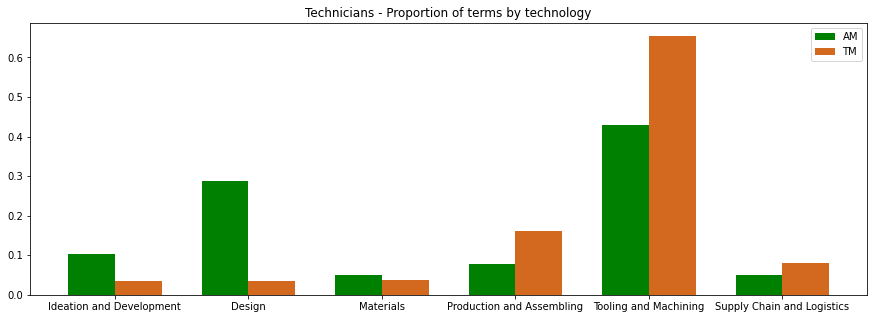

In [195]:
am = O.loc[O.index=='AM']/O.at['AM','Row Total']
tm = O.loc[O.index=='TM']/O.at['TM','Row Total']
am = am.iloc[0,0:-1].to_numpy()
tm = tm.iloc[0,0:-1].to_numpy()
fig = plt.figure(figsize=(15,5))
x = numpy.arange(0,len(mydict.keys()),1)
width = 0.35
plt.bar(x-width/2,am,width,label='AM',color='green')
plt.bar(x+width/2,tm,width,label='TM',color='chocolate')
plt.title('Technicians - Proportion of terms by technology')
plt.xticks(x,list(mydict.keys()),rotation='horizontal')
plt.legend()
plt.show()

### Expected (E) proportions - Technicians

In [196]:
n = O.at['Column Total','Row Total']
E = O.copy()
E = E.astype('float')
for x in E.index[0:-1]:
  for y in E.columns[0:-1]:
    v = (((E.at[x,'Row Total'])*(E.at['Column Total',y]))/n)
    E.at[x,y] = v
E

,Ideation and Development,Design,Materials,Production and Assembling,Tooling and Machining,Supply Chain and Logistics,Row Total
TECH,,,,,,,
AM,9.268936,11.371972,9.385771,40.074517,163.997853,19.900951,254.0
TM,228.731064,280.628028,231.614229,988.925483,4047.002147,491.099049,6268.0
Column Total,238.000000,292.000000,241.000000,1029.000000,4211.000000,511.000000,6522.0


### Chi-squared test for homogeneity - Technicians

In [197]:
O = O.iloc[[0,1],0:-1]
E = E.iloc[[0,1],0:-1]
statistic = numpy.sum(((O-E)**2/E).values)
dof = (len(O.columns)-1)*(len(O.index)-1)
pval = 1-stats.chi2.cdf(statistic,dof)
print(statistic,'Chi-squared without correcting for intra-firm correlation')
print(pval,'p-value, the distributions of AM and TM statistically differ')
tstat_scipy,pval_scipy,ddof_scipy,exp_scipy=chi2_contingency(O,correction=False)
print("Chi-squared test statistic (without Yates correction (from Scipy): " + str(tstat_scipy))
print("p-value without Yates correction (from Scipy): " + str(pval_scipy))

412.53164954827366 Chi-squared without correcting for intra-firm correlation
0.0 p-value, the distributions of AM and TM statistically differ
Chi-squared test statistic (without Yates correction (from Scipy): 412.5316495482736
p-value without Yates correction (from Scipy): 5.902685292775611e-87


### Chi-squared test for homogeneity corrected by firm - Technicians

In [213]:
print(technician.firm.nunique(),'firms')
df = technician.copy()
print(df.TECH.value_counts())
M = df.loc[df.TECH=='AM','firm'].unique()
print(len(M),'paired firms')
df = df[['firm','TECH']+list(mydict.keys())]
df = df.groupby(['firm','TECH']).sum()
mux = pandas.MultiIndex.from_product([sorted(technician.firm.unique()),['AM','TM']],names=['firm','TECH'])
df = df.reindex(mux,fill_value=0)
df

11 firms
TM    1079
AM      55
Name: TECH, dtype: int64
10 paired firms


Ideation and Development  Design  Materials  \
firm               TECH                                                
Align Technolo     AM                           0       0          0   
                   TM                           4       4          0   
Arconic Foundati   AM                           7       8          2   
                   TM                          23      42         92   
Argen              AM                           0       2          0   
                   TM                           0       0          1   
Carbon 3d          AM                           7      12          5   
                   TM                           6       0          4   
Carpenter Technolo AM                           0       4          2   
                   TM                           5      31         65   
Fast Radius        AM                           0       2          0   
                   TM                           0       0          0   
Jabil Circuit      AM                           0       2          0   
                   TM                         155     133         43   
Oerlikon Group     AM                           0       4          0   
                   TM                           1       0         18   
Protolabs          AM                           2       5          4   
                   TM                          12       2          4   
Shapeways          AM                           0       5          0   
                   TM                           0       0          0   
Stratasys Direct   AM                          10      29          0   
                   TM                           6       7          1   

                         Production and Assembling  Tooling and Machining  \
firm               TECH                                                     
Align Technolo     AM                            0                      0   
                   TM                            2                      0   
Arconic Foundati   AM                            0                     14   
                   TM                          369                    988   
Argen              AM                            2                      7   
                   TM                            2                     21   
Carbon 3d          AM                            0                      5   
                   TM                            4                     25   
Carpenter Technolo AM                            1                     12   
                   TM                          253                    631   
Fast Radius        AM                            0                      0   
                   TM                            0                      0   
Jabil Circuit      AM                            0                      0   
                   TM                          356                   2301   
Oerlikon Group     AM                            1                     13   
                   TM                           11                     35   
Protolabs          AM                            1                      5   
                   TM                            2                     32   
Shapeways          AM                            0                      5   
                   TM                            0                      0   
Stratasys Direct   AM                           15                     48   
                   TM                           10                     69   

                         Supply Chain and Logistics  
firm               TECH                              
Align Technolo     AM                             0  
                   TM                             0  
Arconic Foundati   AM                             6  
                   TM                           141  
Argen              AM                             0  
                   TM                             3  
Carbon 3d      

In [214]:
O = df.copy()
O.loc[:,'RS'] = O.sum(numeric_only=True,axis=1)
O['RS'] = O['RS'].groupby(['firm']).transform('sum')
O = O[list(mydict.keys())+['RS']]
for a in list(mydict.keys()):
  O[a] = O[a]/O['RS']
O = O[list(mydict.keys())]
E = df.copy()
E = E.astype('float')
E = E.groupby(['firm']).sum()
E['TECH'] = 'Total'
E = E.set_index('TECH',append=True)
E = E.append(df)
E.sort_index(axis=0,inplace=True)
E['total'] = E[list(mydict.keys())].sum(axis=1)
for i in sorted(technician.firm.unique()):
  for x in E.index:
    if x[0] == i and x[1] != 'Total':
      for y in E.columns[0:-1]:
        v = E.at[x,'total']*E.at[(i,'Total'),y]/E.at[(i,'Total'),'total']
        E.at[x,y] = v
E = E[list(mydict.keys())]
E = E.drop(index='Total',level=1)
E.loc[:,'RS'] = E.sum(numeric_only=True,axis=1)
E['RS'] = E['RS'].groupby(['firm']).transform('sum')
E = E[list(mydict.keys())+['RS']]
for a in list(mydict.keys()):
  E[a] = E[a]/E['RS']
E = E[list(mydict.keys())]
O = O.unstack('TECH').to_numpy()
E = E.unstack('TECH').to_numpy()
D = O - E
Dhat = numpy.mean(D,axis=0)
Vhat = numpy.cov(D,rowvar=False)
STATISTIC = technician.firm.nunique()*(Dhat.T@numpy.linalg.pinv(Vhat)@Dhat)
dof = (len(list(mydict.keys()))-1)*(technician.TECH.nunique()-1)
pval = 1-stats.chi2.cdf(STATISTIC,dof)
print(STATISTIC,'Chi-squared correcting for intra-firm correlation')
print(pval,'p-value, the distributions of AM and TM statistically differ')

8.339108358657818 Chi-squared correcting for intra-firm correlation
0.13851046747653284 p-value, the distributions of AM and TM statistically differ


### Observed (O) proportions - Operators

In [205]:
operator = df3.loc[df3.occupation=='Operator']
O = operator.groupby(['TECH'])[list(mydict.keys())].sum()
O.loc['Column Total'] = O.sum(numeric_only=True,axis=0)
O.loc[:,'Row Total'] = O.sum(numeric_only=True,axis=1)
O

,Ideation and Development,Design,Materials,Production and Assembling,Tooling and Machining,Supply Chain and Logistics,Row Total
TECH,,,,,,,
AM,31,118,15,51,247,32,494
TM,128,467,275,3143,10464,1314,15791
Column Total,159,585,290,3194,10711,1346,16285


### Bars by technology - Operators

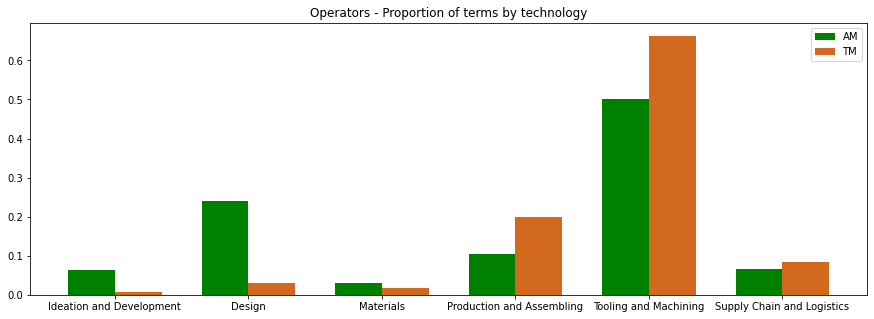

In [206]:
am = O.loc[O.index=='AM']/O.at['AM','Row Total']
tm = O.loc[O.index=='TM']/O.at['TM','Row Total']
am = am.iloc[0,0:-1].to_numpy()
tm = tm.iloc[0,0:-1].to_numpy()
fig = plt.figure(figsize=(15,5))
x = numpy.arange(0,len(mydict.keys()),1)
width = 0.35
plt.bar(x-width/2,am,width,label='AM',color='green')
plt.bar(x+width/2,tm,width,label='TM',color='chocolate')
plt.title('Operators - Proportion of terms by technology')
plt.xticks(x,list(mydict.keys()),rotation='horizontal')
plt.legend()
plt.show()

### Expected (E) proportions - Operators

In [207]:
n = O.at['Column Total','Row Total']
E = O.copy()
E = E.astype('float')
for x in E.index[0:-1]:
  for y in E.columns[0:-1]:
    v = (((E.at[x,'Row Total'])*(E.at['Column Total',y]))/n)
    E.at[x,y] = v
E

,Ideation and Development,Design,Materials,Production and Assembling,Tooling and Machining,Supply Chain and Logistics,Row Total
TECH,,,,,,,
AM,4.823212,17.745778,8.797053,96.888916,324.914584,40.830457,494.0
TM,154.176788,567.254222,281.202947,3097.111084,10386.085416,1305.169543,15791.0
Column Total,159.000000,585.000000,290.000000,3194.000000,10711.000000,1346.000000,16285.0


### Chi-squared test for homogeneity - Operators

In [208]:
O = O.iloc[[0,1],0:-1]
E = E.iloc[[0,1],0:-1]
statistic = numpy.sum(((O-E)**2/E).values)
dof = (len(O.columns)-1)*(len(O.index)-1)
pval = 1-stats.chi2.cdf(statistic,dof)
print(statistic,'Chi-squared without correcting for intra-firm correlation')
print(pval,'p-value, the distributions of AM and TM statistically differ')
tstat_scipy,pval_scipy,ddof_scipy,exp_scipy=chi2_contingency(O,correction=False)
print("Chi-squared test statistic (without Yates correction (from Scipy): " + str(tstat_scipy))
print("p-value without Yates correction (from Scipy): " + str(pval_scipy))

778.7766803825247 Chi-squared without correcting for intra-firm correlation
0.0 p-value, the distributions of AM and TM statistically differ
Chi-squared test statistic (without Yates correction (from Scipy): 778.7766803825247
p-value without Yates correction (from Scipy): 4.512348796655773e-166


### Chi-squared test for homogeneity corrected by firm - Operators

In [209]:
print(operator.firm.nunique(),'firms')
df = operator.copy()
print(df.TECH.value_counts())
M = df.loc[df.TECH=='AM','firm'].unique()
print(len(M),'paired firms')
df = df[['firm','TECH']+list(mydict.keys())]
df = df.groupby(['firm','TECH']).sum()
mux = pandas.MultiIndex.from_product([sorted(operator.firm.unique()),['AM','TM']],names=['firm','TECH'])
df = df.reindex(mux,fill_value=0)
df

12 firms
TM    4153
AM     103
Name: TECH, dtype: int64
11 paired firms


Ideation and Development  Design  Materials  \
firm               TECH                                                
Arconic Foundati   AM                           0       1          0   
                   TM                          35     138         51   
Argen              AM                           0       7          0   
                   TM                           0       0          2   
Carbon 3d          AM                           3       4          1   
                   TM                           3      15         13   
Carpenter Technolo AM                           0      12          6   
                   TM                           5      20         56   
Exone              AM                           0       1          0   
                   TM                           0       0          0   
Fast Radius        AM                           4       6          4   
                   TM                           0       0          0   
Jabil Circuit      AM                           4       5          0   
                   TM                          53     261        132   
Oerlikon Group     AM                           0       0          0   
                   TM                           1       4         12   
Protolabs          AM                           5       9          3   
                   TM                          13      12          7   
Shapeways          AM                           0       3          0   
                   TM                           0       0          1   
Stratasys Direct   AM                          15      66          1   
                   TM                           9       7          1   
Xometry            AM                           0       4          0   
                   TM                           9      10          0   

                         Production and Assembling  Tooling and Machining  \
firm               TECH                                                     
Arconic Foundati   AM                            0                      2   
                   TM                         1204                   2873   
Argen              AM                            6                     14   
                   TM                           20                    145   
Carbon 3d          AM                            0                      0   
                   TM                           11                     14   
Carpenter Technolo AM                            0                     33   
                   TM                          501                   2483   
Exone              AM                            0                      6   
                   TM                            0                      0   
Fast Radius        AM                           12                     24   
                   TM                            2                      4   
Jabil Circuit      AM                            0                      1   
                   TM                         1284                   4073   
Oerlikon Group     AM                            0                      0   
                   TM                           21                    409   
Protolabs          AM                            2                     19   
                   TM                           42                    252   
Shapeways          AM                            3                      2   
                   TM                            0                      0   
Stratasys Direct   AM                           28                    133   
                   TM                           43                    158   
Xometry            AM                            0                     13   
                   TM                           15                     53   

                         Supply Chain and Logistics  
firm               TECH                              
Arconic Foundati   AM                    

In [210]:
O = df.copy()
O.loc[:,'RS'] = O.sum(numeric_only=True,axis=1)
O['RS'] = O['RS'].groupby(['firm']).transform('sum')
O = O[list(mydict.keys())+['RS']]
for a in list(mydict.keys()):
  O[a] = O[a]/O['RS']
O = O[list(mydict.keys())]
E = df.copy()
E = E.astype('float')
E = E.groupby(['firm']).sum()
E['TECH'] = 'Total'
E = E.set_index('TECH',append=True)
E = E.append(df)
E.sort_index(axis=0,inplace=True)
E['total'] = E[list(mydict.keys())].sum(axis=1)
for i in sorted(operator.firm.unique()):
  for x in E.index:
    if x[0] == i and x[1] != 'Total':
      for y in E.columns[0:-1]:
        v = E.at[x,'total']*E.at[(i,'Total'),y]/E.at[(i,'Total'),'total']
        E.at[x,y] = v
E = E[list(mydict.keys())]
E = E.drop(index='Total',level=1)
E.loc[:,'RS'] = E.sum(numeric_only=True,axis=1)
E['RS'] = E['RS'].groupby(['firm']).transform('sum')
E = E[list(mydict.keys())+['RS']]
for a in list(mydict.keys()):
  E[a] = E[a]/E['RS']
E = E[list(mydict.keys())]
O = O.unstack('TECH').to_numpy()
E = E.unstack('TECH').to_numpy()
D = O - E
Dhat = numpy.mean(D,axis=0)
Vhat = numpy.cov(D,rowvar=False)
STATISTIC = operator.firm.nunique()*(Dhat.T@numpy.linalg.pinv(Vhat)@Dhat)
dof = (len(list(mydict.keys()))-1)*(operator.TECH.nunique()-1)
pval = 1-stats.chi2.cdf(STATISTIC,dof)
print(STATISTIC,'Chi-squared correcting for intra-firm correlation')
print(pval,'p-value, the distributions of AM and TM statistically differ')

12.889185336060157 Chi-squared correcting for intra-firm correlation
0.02443964952121025 p-value, the distributions of AM and TM statistically differ
